#To- Do- Task

# Problem 1- Data Read, Write and Inspect:

In [101]:
#1
import pandas as pd
import numpy as np

In [102]:
#2
df = pd.read_csv("/content/drive/MyDrive/bank.csv")
df

,S.N.,Name,Age,Job,Balance,Marital,Education,Default,Housing,Loan
0,1,John,35,Manager,5000,Married,Graduate,no,yes,no
1,2,Alice,28,Clerk,3000,Single,High School,no,yes,no
2,3,Bob,42,Technician,7000,Married,Graduate,yes,no,yes
3,4,Eve,30,Manager,4500,Single,Postgraduate,no,yes,no
4,5,Charlie,38,Clerk,6000,Married,Graduate,no,no,no


In [103]:
#a
object_columns = df.select_dtypes(include='object').columns
print("Columns with object dtype:", object_columns)

Columns with object dtype: Index(['Name', 'Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan'], dtype='object')


In [104]:
#b
for col in object_columns:
    print(f"Unique values in '{col}':", df[col].unique())


Unique values in 'Name': ['John' 'Alice' 'Bob' 'Eve' 'Charlie']
Unique values in 'Job': ['Manager' 'Clerk' 'Technician']
Unique values in 'Marital': ['Married' 'Single']
Unique values in 'Education': ['Graduate' 'High School' 'Postgraduate']
Unique values in 'Default': ['no' 'yes']
Unique values in 'Housing': ['yes' 'no']
Unique values in 'Loan': ['no' 'yes']


In [105]:
#c
print("Null values in each column:\n", df.isnull().sum())

Null values in each column:
    S.N.      0
Name         0
Age          0
Job          0
Balance      0
Marital      0
Education    0
Default      0
Housing      0
Loan         0
dtype: int64


In [106]:
#3
numeric_df = df.select_dtypes(exclude='object')
numeric_df.to_csv('banknumericdata.csv', index=False)

In [107]:
#4
numeric_df_loaded = pd.read_csv('banknumericdata.csv')
print("Summary statistics:\n", numeric_df_loaded.describe())

Summary statistics:
            S.N.        Age      Balance
count  5.000000   5.000000     5.000000
mean   3.000000  34.600000  5100.000000
std    1.581139   5.727128  1516.575089
min    1.000000  28.000000  3000.000000
25%    2.000000  30.000000  4500.000000
50%    3.000000  35.000000  5000.000000
75%    4.000000  38.000000  6000.000000
max    5.000000  42.000000  7000.000000


#Problem 2- Data Imputations

In [108]:
#1
df = pd.read_csv("/content/drive/MyDrive/medical_student.csv")
print("DataFrame info:")
df.head()

DataFrame info:


,Student_ID,Name,Age,Gender,Marks,Attendance,Department
0,1,Ayusha,21.0,F,85.0,90.0,MBBS
1,2,Rahul,22.0,M,78.0,88.0,BDS
2,3,Sita,NaN,F,92.0,95.0,MBBS
3,4,Arjun,23.0,M,NaN,85.0,BDS
4,5,Neha,22.0,F,88.0,NaN,MBBS


In [109]:
#2
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  9 non-null      int64  
 1   Name        9 non-null      object 
 2   Age         7 non-null      float64
 3   Gender      9 non-null      object 
 4   Marks       8 non-null      float64
 5   Attendance  8 non-null      float64
 6   Department  9 non-null      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 636.0+ bytes


,0
Student_ID,0
Name,0
Age,2
Gender,0
Marks,1
Attendance,1
Department,0


In [110]:
#3
df["Age"] = df["Age"].fillna(df["Age"].mean())



In [111]:

df["Marks"] = df["Marks"].fillna(df["Marks"].mean())
df["Attendance"] = df["Attendance"].fillna(df["Attendance"].median())



In [112]:
#4
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

df

Duplicate rows: 0


,Student_ID,Name,Age,Gender,Marks,Attendance,Department
0,1,Ayusha,21.000000,F,85.00,90.0,MBBS
1,2,Rahul,22.000000,M,78.00,88.0,BDS
2,3,Sita,21.857143,F,92.00,95.0,MBBS
3,4,Arjun,23.000000,M,84.75,85.0,BDS
4,5,Neha,22.000000,F,88.00,89.0,MBBS
5,6,Rahul,22.000000,M,78.00,88.0,BDS
6,7,Kumar,21.000000,M,75.00,80.0,BAMS
7,8,Priya,22.000000,F,90.00,92.0,BAMS
8,9,Sita,21.857143,F,92.00,95.0,MBBS


#Exercises- Data Cleaning and Transformations with ”Titanic Dataset”:

#Problem 1- Data Read, Write and Inspect:

In [113]:
df = pd.read_csv("/content/drive/MyDrive/titanic.csv")
df.head()


,Name,Pclass,Sex,Age,Fare,Survived,Embarked
0,Passenger1,1,male,35,80.0,1,S
1,Passenger2,1,female,28,110.0,1,C
2,Passenger3,1,female,40,83.5,0,Q
3,Passenger4,1,male,52,134.5,1,S


In [114]:
selected_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
selected_df.head()


,Name,Pclass,Sex,Age,Fare,Survived
0,Passenger1,1,male,35,80.0,1
1,Passenger2,1,female,28,110.0,1
2,Passenger3,1,female,40,83.5,0
3,Passenger4,1,male,52,134.5,1


In [115]:
first_class = selected_df[selected_df['Pclass'] == 1]
first_class.head()

,Name,Pclass,Sex,Age,Fare,Survived
0,Passenger1,1,male,35,80.0,1
1,Passenger2,1,female,28,110.0,1
2,Passenger3,1,female,40,83.5,0
3,Passenger4,1,male,52,134.5,1


In [116]:
first_class['Fare'].mean()


np.float64(102.0)

In [117]:
first_class['Fare'].median()


96.75

In [118]:
first_class['Fare'].max()


134.5

In [119]:
first_class['Fare'].min()


80.0

# Problem- 2:

In [120]:
first_class['Age'].isnull().sum()


np.int64(0)

In [121]:
first_class = first_class.dropna(subset=['Age'])
first_class.head()

,Name,Pclass,Sex,Age,Fare,Survived
0,Passenger1,1,male,35,80.0,1
1,Passenger2,1,female,28,110.0,1
2,Passenger3,1,female,40,83.5,0
3,Passenger4,1,male,52,134.5,1


#Problem 3

In [124]:
emb = pd.get_dummies(df['Embarked'], prefix="Embarked")
df2 = pd.concat([df, emb], axis=1)
df2.drop(columns=['Embarked'], inplace=True)
df2.head()


,Name,Pclass,Sex,Age,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,Passenger1,1,male,35,80.0,1,False,False,True
1,Passenger2,1,female,28,110.0,1,True,False,False
2,Passenger3,1,female,40,83.5,0,False,True,False
3,Passenger4,1,male,52,134.5,1,False,False,True


#Problem 4

In [126]:
df.groupby('Sex')['Survived'].mean()


,Survived
Sex,
female,0.5
male,1.0


In [128]:
import matplotlib.pyplot as plt


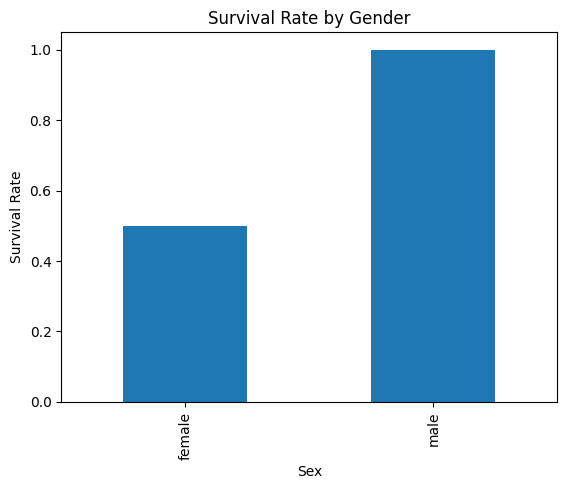

In [129]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


#problem 5

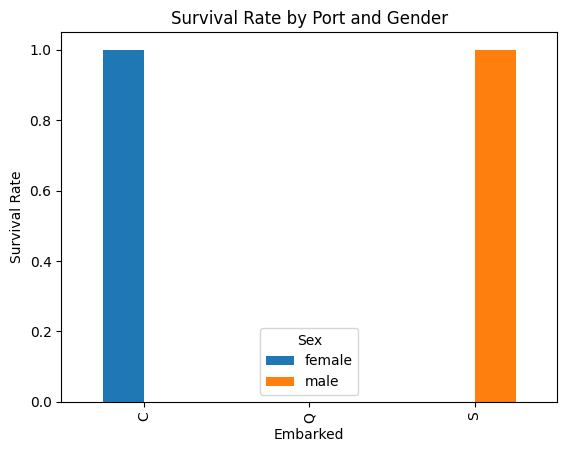

In [130]:
df.groupby(['Embarked','Sex'])['Survived'].mean().unstack().plot(kind='bar')
plt.title("Survival Rate by Port and Gender")
plt.ylabel("Survival Rate")
plt.show()
